In [1]:
import cv2
from darkflow.net.build import TFNet
import numpy as np
import time

import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

/home/cesare/anaconda3/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
!./flow --h

/home/cesare/anaconda3/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters

Example usage: flow --imgdir sample_img/ --model cfg/yolo.cfg --load bin/yolo.weights

Arguments:
  --config         path to .cfg directory
  --imgdir         path to testing directory with images
  --save           save checkpoint every ? training examples
  --keep           Number of most recent training results to save
  --labels         path to labels file
  --saveVideo      Records video from input video or camera
  --load           how to initialize the net? Either from .weights or a checkpoint, or even from scratch
  --epoch          number of epoch
  --backup         path to backup folder
  --annotation     path to annotation directory
  --demo           de

In [3]:
option = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolo.weights',
    'threshold': 0.25,
    'gpu': 0.0
}

tfnet = TFNet(option)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.04379129409790039s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!

# Processing Images (1)

In [4]:
# read the color image and covert to RGB

img = cv2.imread('eagle.jpg', cv2.IMREAD_COLOR)
#img = cv2.imread('dog.jpg', cv2.IMREAD_COLOR)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# use YOLO to predict the image
result = tfnet.return_predict(img)

result

[{'bottomright': {'x': 643, 'y': 474},
  'confidence': 0.942334,
  'label': 'bird',
  'topleft': {'x': 129, 'y': 43}}]

In [5]:
img.shape

(512, 773, 3)

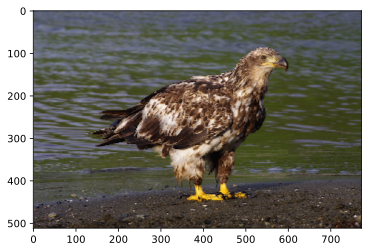

In [6]:
plt.imshow(img)
plt.show()

(129, 43)
(643, 474)


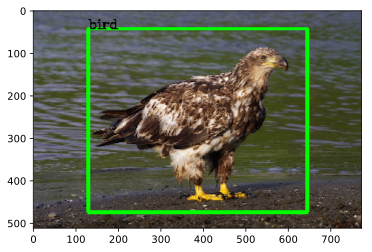

In [7]:
# pull out some info from the results

tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
print(tl)
br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
print(br)
label = result[0]['label']

# add the box and label and display it
img = cv2.rectangle(img, tl, br, (0, 255, 0), 7)
img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
plt.imshow(img)
plt.show()

# Processing Images (2)

In [8]:
colors = [tuple(255 * np.random.rand(3)) for i in range(7)]  #range(100)

for color in colors:
    print(color)

(125.29909471398213, 66.43052667306824, 233.95950140867998)
(53.51327727710196, 26.421772550682192, 133.34803155242741)
(81.86380720358014, 215.50178359231305, 13.56071492722476)
(250.77459139336315, 191.20910690721672, 12.928486975958082)
(52.96829185745418, 132.83937695085322, 52.656101948005784)
(105.44747003025394, 185.4966687208988, 57.51806517373207)
(224.45542992335461, 188.5596872852984, 92.39231832269635)


{'label': 'bicycle', 'confidence': 0.79921085, 'bottomright': {'y': 462, 'x': 550}, 'topleft': {'y': 115, 'x': 85}}
{'label': 'truck', 'confidence': 0.8184496, 'bottomright': {'y': 168, 'x': 698}, 'topleft': {'y': 82, 'x': 461}}
{'label': 'dog', 'confidence': 0.8198157, 'bottomright': {'y': 534, 'x': 326}, 'topleft': {'y': 215, 'x': 130}}
FPS 0.7


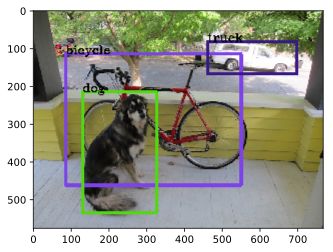

In [9]:
# read the color image and covert to RGB

stime = time.time()
img = cv2.imread('dog.jpg', cv2.IMREAD_COLOR)
#img = cv2.imread('eagle.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

results = tfnet.return_predict(img)

for color, result in zip(colors, results):
    tl = (result['topleft']['x'], result['topleft']['y'])
    br = (result['bottomright']['x'], result['bottomright']['y'])
    label = result['label']
    img = cv2.rectangle(img, tl, br, color, 7)
    img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
    print(result)
    
cv2.imshow('img', img)
print('FPS {:.1f}'.format(1 / (time.time() - stime)))  # Frame per seconds

plt.imshow(img)
plt.show()

# Video Detection

In [25]:
capture = cv2.VideoCapture('../VideosHPB/IMAG0011.mp4')
colors = [tuple(255 * np.random.rand(3)) for i in range(15)]  #range(100)

In [26]:
for color in colors:
    print(color)

(218.30779338205085, 130.88150004310512, 233.14234303135927)
(228.27061167475367, 194.2746551688827, 251.59273642622304)
(139.38341584962131, 220.49103070020263, 19.745044266331195)
(159.56736819925766, 145.29556592407675, 233.19090668549515)
(203.51138434525166, 162.27258391408185, 136.26477668234864)
(185.4021533145393, 70.69989480547275, 6.110485007653372)
(188.0168439381487, 1.3936186183456556, 179.937253724619)
(11.19076898571111, 63.26836851779835, 118.63375037135376)
(80.90543971719818, 249.80744237526045, 238.01801562110626)
(209.83509123633215, 170.22141947414022, 101.02254241314216)
(37.985134866025184, 243.01060773595003, 150.2379158472424)
(247.63528831314915, 115.50817463063926, 5.73052685219883)
(10.816927412070525, 241.1740868711248, 245.5647498093929)
(21.6151242239116, 222.83553754160718, 46.56104020805686)
(60.07648919973692, 191.2145507092521, 242.86645608863088)


In [27]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 0.7, (640,480))

In [28]:
while (capture.isOpened()):
    stime = time.time()
    ret, frame = capture.read()
    results = tfnet.return_predict(frame)
    if ret:
        for color, result in zip(colors, results):
            tl = (result['topleft']['x'], result['topleft']['y'])
            br = (result['bottomright']['x'], result['bottomright']['y'])
            label = result['label']
            frame = cv2.rectangle(frame, tl, br, color, 7)
            frame = cv2.putText(frame, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
        cv2.imshow('frame', frame)
        print('FPS {:.1f}'.format(1 / (time.time() - stime)))  # Frame per seconds
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        capture.release()
        out.release()
        cv2.destroyAllWindows()
        break

'''
capture.release()
out.release()
cv2.destroyAllWindows()
'''

FPS 0.8
FPS 0.8
FPS 0.9
FPS 0.8
FPS 0.9
FPS 0.8
FPS 0.9
FPS 0.8
FPS 0.8
FPS 0.9
FPS 0.8
FPS 0.8
FPS 0.9
FPS 0.9
FPS 0.9
FPS 0.8
FPS 0.8
FPS 0.8
FPS 0.9
FPS 0.8
FPS 0.8
FPS 0.8
FPS 0.9
FPS 0.9
FPS 0.9
FPS 1.0
FPS 1.0
FPS 0.9
FPS 0.9
FPS 1.0
FPS 0.9
FPS 1.0
FPS 0.9
FPS 0.9
FPS 0.9
FPS 1.0
FPS 1.0
FPS 0.9
FPS 0.9


'\ncapture.release()\nout.release()\ncv2.destroyAllWindows()\n'

# Dog Prediction

In [10]:
import os
os.getcwd()
#os.chdir('darkflow')

'/home/cesare/HPB/darkflow-master'

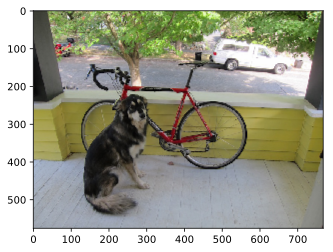

'\nplt.imshow(frame)\nplt.show()\n'

In [11]:
frame = cv2.imread('dog.jpg', cv2.IMREAD_COLOR)
frame = cv2.imread("sample_img/sample_dog.jpg")

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

fig = plt.figure(1)
fig.gca().imshow(frame)
plt.show()

'''
plt.imshow(frame)
plt.show()
'''

In [12]:
#
# Result from return_predict(img) will be a list of dictionaries 
# representing each detected object's values in the same format as the JSON output listed above
#
result = tfnet.return_predict(frame)
result

[{'bottomright': {'x': 550, 'y': 462},
  'confidence': 0.79921085,
  'label': 'bicycle',
  'topleft': {'x': 85, 'y': 115}},
 {'bottomright': {'x': 698, 'y': 168},
  'confidence': 0.8184496,
  'label': 'truck',
  'topleft': {'x': 461, 'y': 82}},
 {'bottomright': {'x': 326, 'y': 534},
  'confidence': 0.8198157,
  'label': 'dog',
  'topleft': {'x': 130, 'y': 215}}]

In [13]:
print(frame.shape)

(576, 768, 3)


In [14]:
preprocessed = tfnet.framework.preprocess(frame)

feed_dict = {tfnet.inp: [preprocessed]}

net_out = tfnet.sess.run(tfnet.out,feed_dict)[0]

processed = tfnet.framework.postprocess(net_out, frame, False)

cv2.imwrite('out_dog.jpg', processed)

True

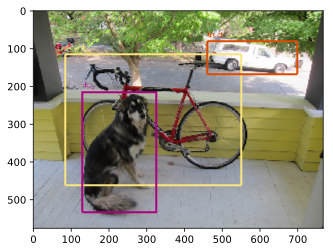

In [15]:
'''
fig = plt.figure(1)
fig.gca().imshow(processed)
plt.show()
'''
plt.imshow(processed)
plt.show()

# Dog Prediction: B&W image

In [16]:
# B&W image: using red channel only
imgcvbw = np.stack((frame[:,:,0],frame[:,:,0],frame[:,:,0]),axis=2)
#imgcvbw = np.stack((frame[:,:,2],frame[:,:,2],frame[:,:,2]),axis=2)

result = tfnet.return_predict(imgcvbw)
result

[{'bottomright': {'x': 574, 'y': 474},
  'confidence': 0.8233406,
  'label': 'bicycle',
  'topleft': {'x': 62, 'y': 103}},
 {'bottomright': {'x': 702, 'y': 164},
  'confidence': 0.5493404,
  'label': 'truck',
  'topleft': {'x': 458, 'y': 73}},
 {'bottomright': {'x': 697, 'y': 162},
  'confidence': 0.4179979,
  'label': 'car',
  'topleft': {'x': 462, 'y': 83}},
 {'bottomright': {'x': 312, 'y': 476},
  'confidence': 0.8204676,
  'label': 'dog',
  'topleft': {'x': 134, 'y': 221}}]

In [17]:
print(imgcvbw.shape)

(576, 768, 3)


In [18]:
preprocessed = tfnet.framework.preprocess(imgcvbw)

feed_dict = {tfnet.inp: [preprocessed]}

net_out = tfnet.sess.run(tfnet.out,feed_dict)[0]

processed = tfnet.framework.postprocess(net_out, imgcvbw, False)

cv2.imwrite('out_dog.jpg', processed)

True

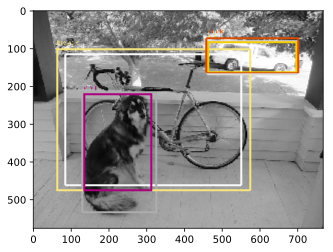

In [19]:
plt.imshow(processed)
plt.show()

# Resize & Weights

In [20]:
im = np.copy(frame)
h, w, _ = im.shape
print(im.shape)
#
im = tfnet.framework.resize_input(im)
print(im.shape)

(576, 768, 3)
(608, 608, 3)


In [21]:
this_inp = np.expand_dims(im, 0)
feed_dict = {tfnet.inp : this_inp}
weights2 = tfnet.sess.run('0-convolutional/kernel/Assign:0', feed_dict = feed_dict)

In [22]:
# weights and biases
weights = tfnet.sess.run(tfnet.darknet.layers[0].w['kernel'])
biases  = tfnet.sess.run(tfnet.darknet.layers[0].w['biases'])

In [23]:
weights2

array([[[[-5.85820116e-02, -9.19402122e-01,  1.08703125e+00,
          -4.77864332e-02,  6.07924052e-02, -4.88744140e-01,
          -1.61003023e-01, -2.60096818e-01, -6.67757630e-01,
          -1.87983853e-03, -1.36774424e-02,  3.31577659e-01,
          -1.11218795e-01, -2.28259459e-01, -7.78792426e-02,
          -1.26208216e-02, -1.45853251e-01, -2.93177605e-01,
           2.17146128e-01,  2.37495288e-01,  3.10901478e-02,
           5.09117842e-01,  3.31337973e-02,  7.15596080e-02,
           5.70728123e-01,  5.37396967e-03, -8.50121453e-02,
           1.91425100e-01, -1.76974721e-02,  5.55208046e-03,
           3.96904796e-01, -1.26344562e-01],
         [ 7.96936452e-03, -1.18751359e+00,  9.28477287e-01,
           5.64380884e-02,  8.67455453e-03,  5.93011230e-02,
          -1.85713351e-01, -2.48401254e-01, -5.12754560e-01,
           3.94175649e-02,  1.87736063e-03,  2.76563670e-02,
           8.47112834e-02, -3.22699159e-01, -1.74370259e-01,
           4.65093136e-01, -9.55696255e-

In [24]:
weights

array([[[[-5.85820116e-02, -9.19402122e-01,  1.08703125e+00,
          -4.77864332e-02,  6.07924052e-02, -4.88744140e-01,
          -1.61003023e-01, -2.60096818e-01, -6.67757630e-01,
          -1.87983853e-03, -1.36774424e-02,  3.31577659e-01,
          -1.11218795e-01, -2.28259459e-01, -7.78792426e-02,
          -1.26208216e-02, -1.45853251e-01, -2.93177605e-01,
           2.17146128e-01,  2.37495288e-01,  3.10901478e-02,
           5.09117842e-01,  3.31337973e-02,  7.15596080e-02,
           5.70728123e-01,  5.37396967e-03, -8.50121453e-02,
           1.91425100e-01, -1.76974721e-02,  5.55208046e-03,
           3.96904796e-01, -1.26344562e-01],
         [ 7.96936452e-03, -1.18751359e+00,  9.28477287e-01,
           5.64380884e-02,  8.67455453e-03,  5.93011230e-02,
          -1.85713351e-01, -2.48401254e-01, -5.12754560e-01,
           3.94175649e-02,  1.87736063e-03,  2.76563670e-02,
           8.47112834e-02, -3.22699159e-01, -1.74370259e-01,
           4.65093136e-01, -9.55696255e-